In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom

# Problem 1

Part c

In [334]:
def SIR(S0,I0,R0, c, gamma, t_max, stepsize):
    T = np.arange(0,t_max+stepsize,stepsize)
    G = len(S0)
    S = np.zeros([len(T),G])
    I = np.zeros([len(T),G])
    R = np.zeros([len(T),G])

    for idx,t in enumerate(T):
        if idx==0:
            S[idx] = S0
            I[idx] = I0
            R[idx] = R0
            N = S[0,:] + I[0,:] + R[0,:]
        else:
            Q = np.diag(S[idx-1,:]) @ np.diag([1, 2, 3, 4]) @ np.full((4,4), c) @ I[idx-1,:] / N # compare this to notes...
            dS_dt = -Q
            dI_dt = Q - gamma*I[idx-1,:]
            dR_dt = gamma*I[idx-1,:]

            S[idx] = S[idx-1,:] + dS_dt * stepsize
            I[idx] = I[idx-1,:] + dI_dt * stepsize
            R[idx] = R[idx-1,:] + dR_dt * stepsize
    
    return S, I, R, T

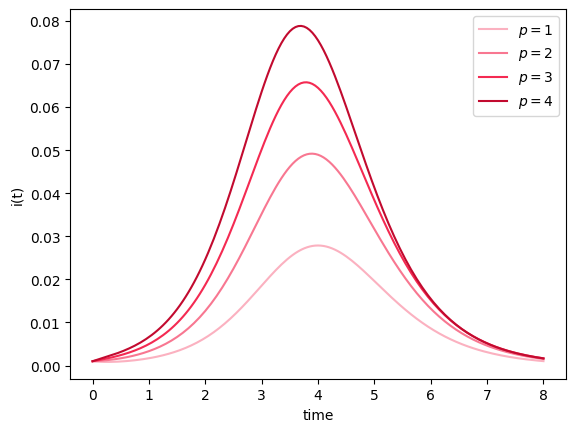

In [361]:
c = 0.45
N = np.array([1000, 1000, 1000, 1000])
S, I, R, T = SIR(N * 0.999, N * 0.001, N * 0, c, gamma, 8,0.05)
fig, ax = plt.subplots()
ax.plot(T, I[:,0] / 1000, c = '#FBB1C0', label = r'$p = 1$')
ax.plot(T, I[:,1] / 1000, c = '#F87791', label = r'$p = 2$')
ax.plot(T, I[:,2] / 1000, c = '#F42A52', label = r'$p = 3$')
ax.plot(T, I[:,3] / 1000, c = '#C20A2F', label = r'$p = 4$')
ax.set_xlabel("time")
ax.set_ylabel("i(t)")
ax.legend()
fig.savefig('hw3p1c.png', dpi=300, bbox_inches = "tight")

Part d

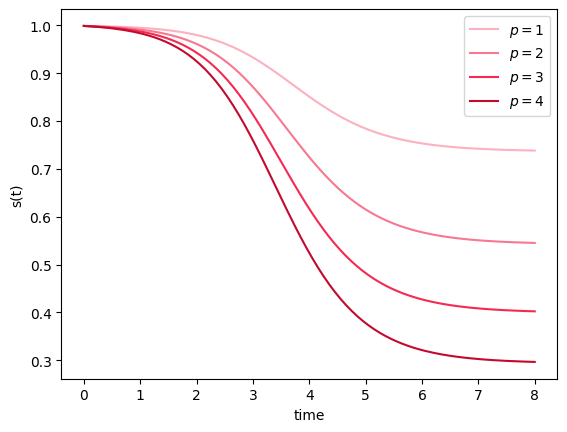

In [369]:
c = 0.45
N = np.array([1000, 1000, 1000, 1000])
S, I, R, T = SIR(N * 0.999, N * 0.001, N * 0, c, gamma, 8,0.05)
fig, ax = plt.subplots()
ax.plot(T, S[:,0] / 1000, c = '#FBB1C0', label = r'$p = 1$')
ax.plot(T, S[:,1] / 1000, c = '#F87791', label = r'$p = 2$')
ax.plot(T, S[:,2] / 1000, c = '#F42A52', label = r'$p = 3$')
ax.plot(T, S[:,3] / 1000, c = '#C20A2F', label = r'$p = 4$')
ax.set_xlabel("time")
ax.set_ylabel("s(t)")
ax.legend()
fig.savefig('hw3p1da.png', dpi=300, bbox_inches = "tight")

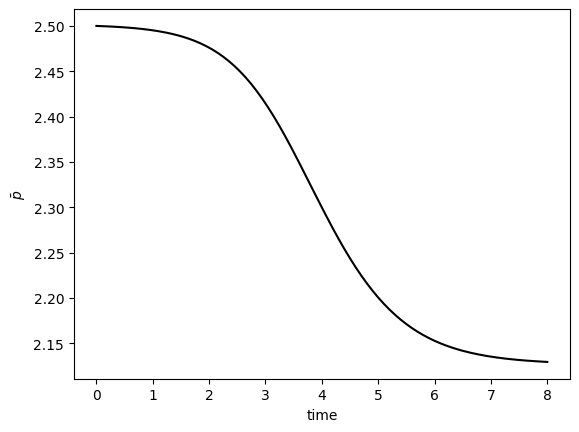

In [372]:
fig, ax = plt.subplots()
ax.plot(T, (1 * S[:,0] + 2 * S[:,1] + 3 * S[:,2] + 4 * S[:,3]) / (S[:,0] + S[:,1] + S[:,2] + S[:,3]), c = 'black')
ax.set_xlabel("time")
ax.set_ylabel(r'$\bar{p}$')
fig.savefig('hw3p1db.png', dpi=300, bbox_inches = "tight")

# Problem 2

Part a

In [2]:
def branch(gen, n, p):
    if gen > 1000:
        return True
    draw = nbinom.rvs(n=n,p=p)
    if draw == 0:
        return False
    else:
        for child in range(draw):
            if branch(gen + 1, n, p) == True:
                return True
        return False

In [387]:
k = [0.1, 0.5, 1.0, 5.0, 10**3]
R0 = 3 # Mean R0
die_probs = []
for val in k:
    dies = 0
    for i in range(10**3):
        mean = R0
        variance = mean + (mean**2)/val
        p = mean/variance
        n = mean**2 / (variance - mean)
        if branch(0, n, p) == False:
            dies += 1
    die_probs.append(dies / 10**3)

In [388]:
die_probs

[0.838, 0.503, 0.345, 0.111, 0.062]

Part b

In [3]:
def branch(gen, n, p):
    if gen > 1000:
        return (True, 1000)
    draw = nbinom.rvs(n=n,p=p)
    if draw == 0:
        return (False, gen)
    else:
        max_gen = gen
        for child in range(draw):
            live, b_gens = branch(gen + 1, n, p)
            if live == True:
                return (True, 1000)
            else:
                if b_gens > max_gen:
                    max_gen = b_gens
        return (False, max_gen)

In [6]:
k = 0.1
R_0 = 3
sizes = []
count = 0
while count < 100000:
    mean = R_0
    variance = mean + (mean**2)/k
    p = mean/variance
    n = mean**2 / (variance - mean)
    live, gens = branch(0, n, p)
    if live == False:
        sizes.append(gens)
        count += 1

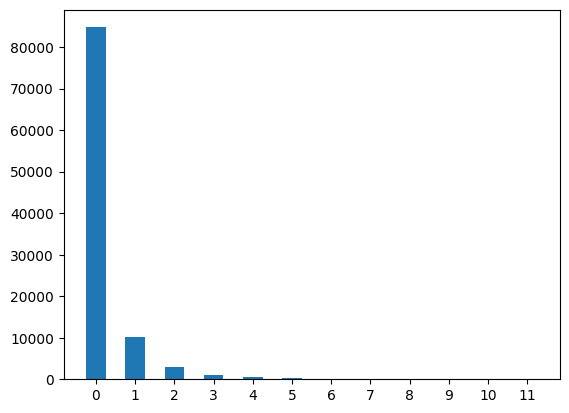

In [7]:
min_val = min(sizes)
max_val = max(sizes)

# Create bins for each discrete value
bins = np.arange(min_val - 0.5, max_val + 1.5, 1)
plt.hist(sizes, bins = bins, rwidth = 0.5)
plt.xticks(np.arange(min_val, max_val + 1, 1))
plt.show()